# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='years', ylabel='number'>

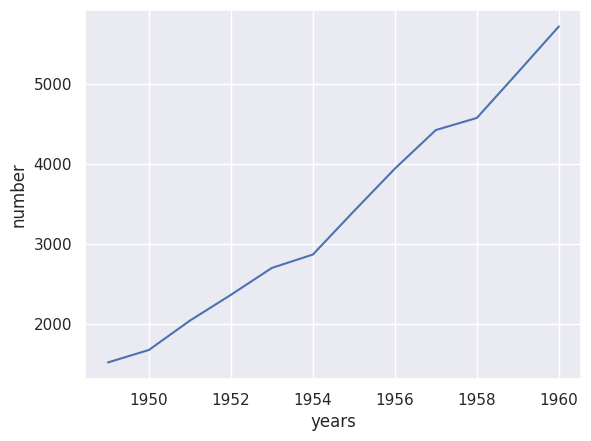

In [3]:
data1=data[['year','passengers']].groupby('year',observed=False).agg('sum')
data2=pd.DataFrame()
data2['number']=data1['passengers']
data2['years']=data1['passengers'].index
sns.set()
sns.lineplot(data2,x='years',y='number')

答：从上图可以看出乘客总量总体呈上升趋势，并且乘客总量与年份可能存在线性关系。

<Axes: xlabel='month', ylabel='number'>

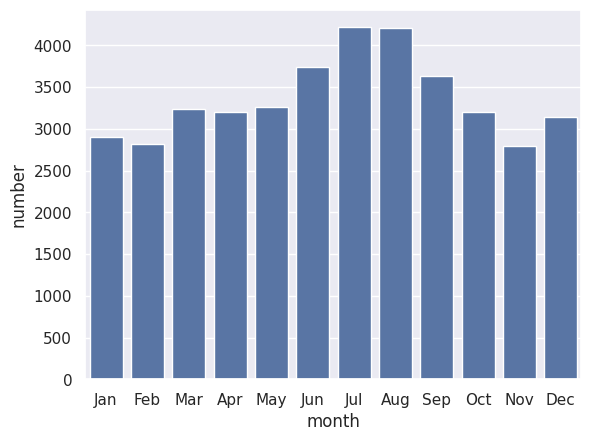

In [4]:
data1=data[['month','passengers']].groupby('month',observed=False).agg('sum')
data2=pd.DataFrame()
data2['number']=data1['passengers']
data2['month']=data1['passengers'].index
sns.set()
sns.barplot(data2,x='month',y='number')

答：从上图可以看出每年的乘客总量高峰在7,8月份。2月至7月一直在上升，8月后一直在下降，1月，12月份有反常。这些现象出现的原因可能与放假有关。

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [5]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


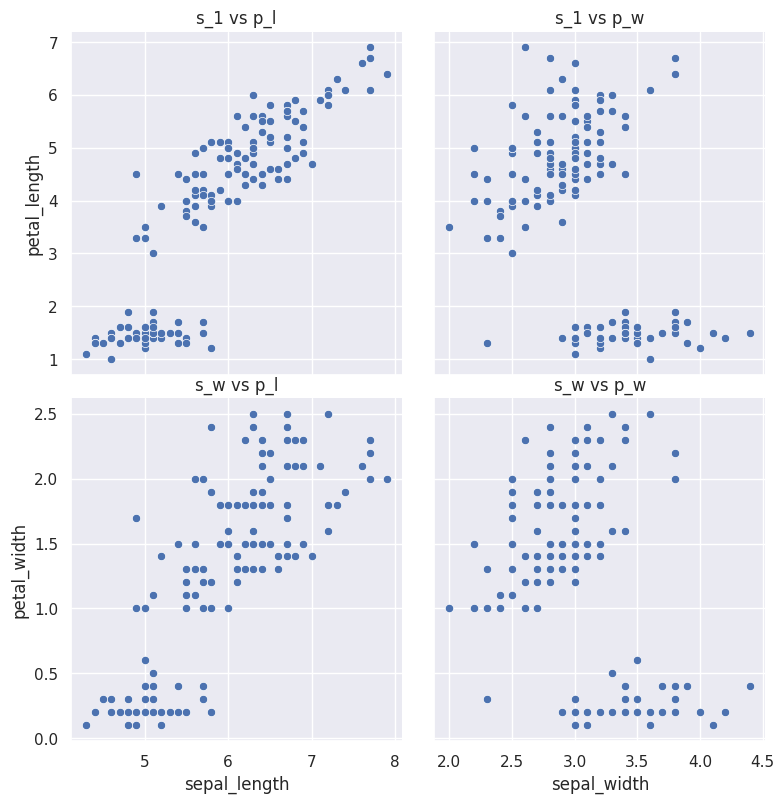

In [6]:
sns.set()
mul= sns.PairGrid(data,
                 x_vars=["sepal_length", "sepal_width"],
                 y_vars=["petal_length", "petal_width"],
                 aspect=1, 
                 height=4)
mul.map(sns.scatterplot)

xlab=['s_1','s_w']
ylab=['p_l','p_w']
for i in range(2):
    for j in range(2):
        mul.axes[i][j].set_title(xlab[i]+' vs '+ylab[j])

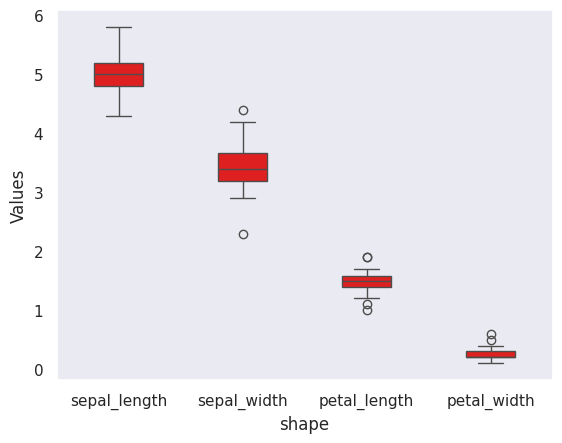

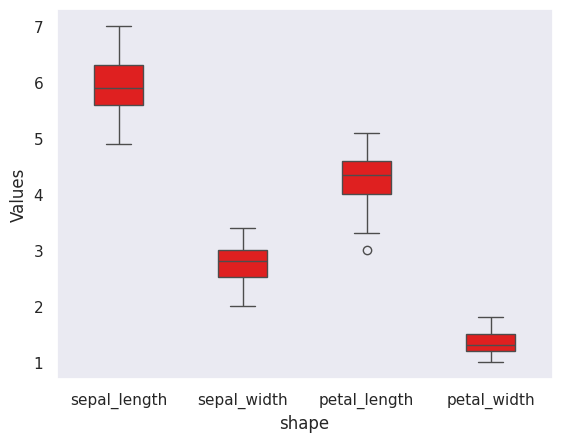

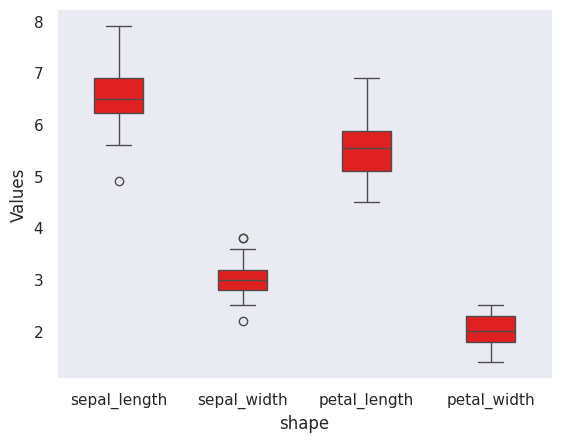

In [7]:
sns.set_palette(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))
sns.set_style('dark')
data1=pd.melt(data,
              id_vars='species',
              var_name='shape',
              value_name='Values')
species=data1['species'].unique()
for i in species:
    plt.figure()
    sns.boxplot(data1[data1['species']==i],x='shape',y='Values',color='#ff0000',width=.4)

setosa花的花萼长度更集中，宽度最分散但是整体最宽，花瓣长度与宽度是最小的；
versicolor的花萼长度更长，宽度整体最大，花瓣长度中等，宽度中等；
virginica的花萼的宽度最小也更集中，并且它的花瓣整体上是最长的，也是最宽的。

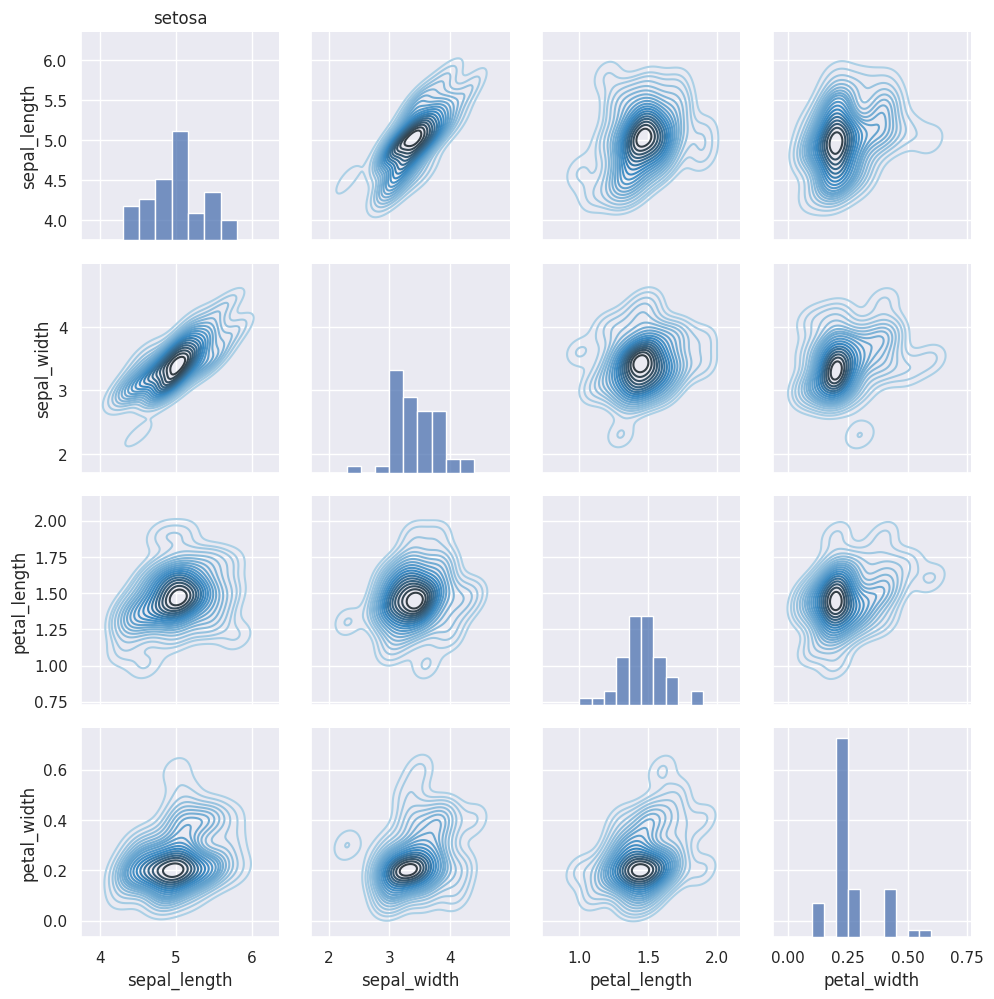

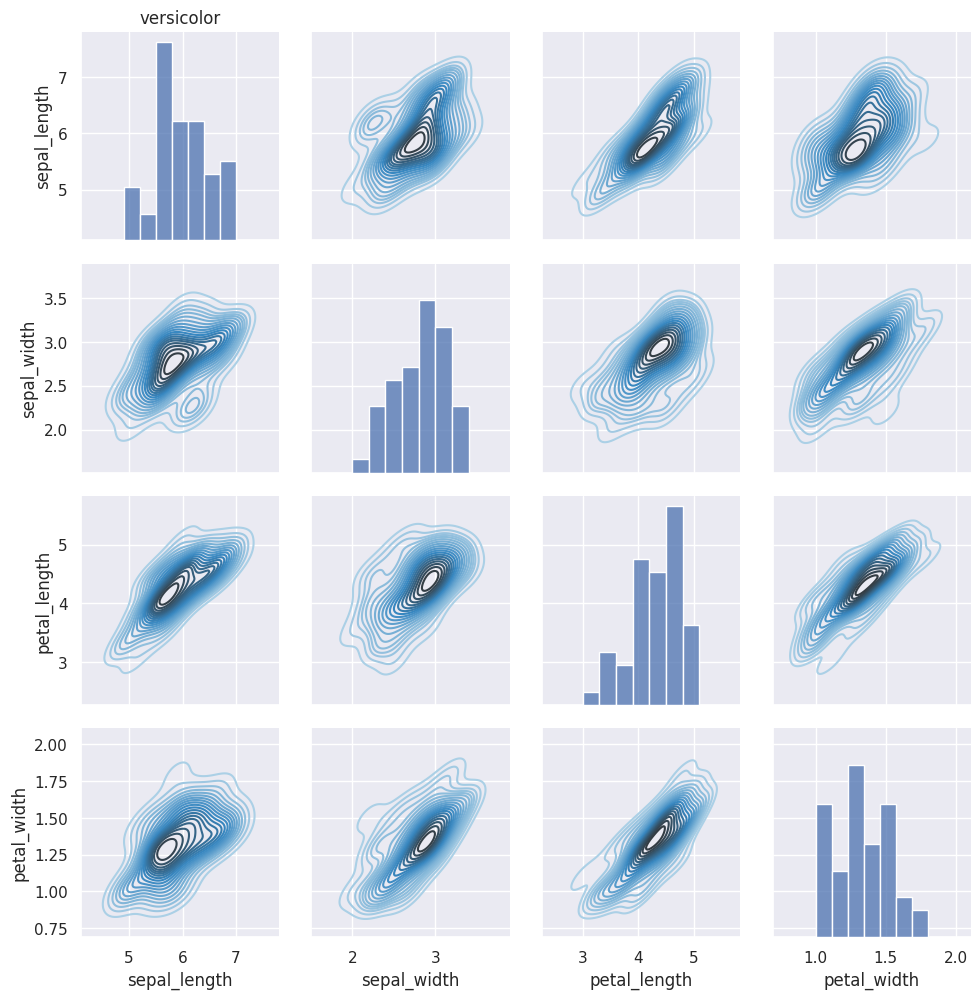

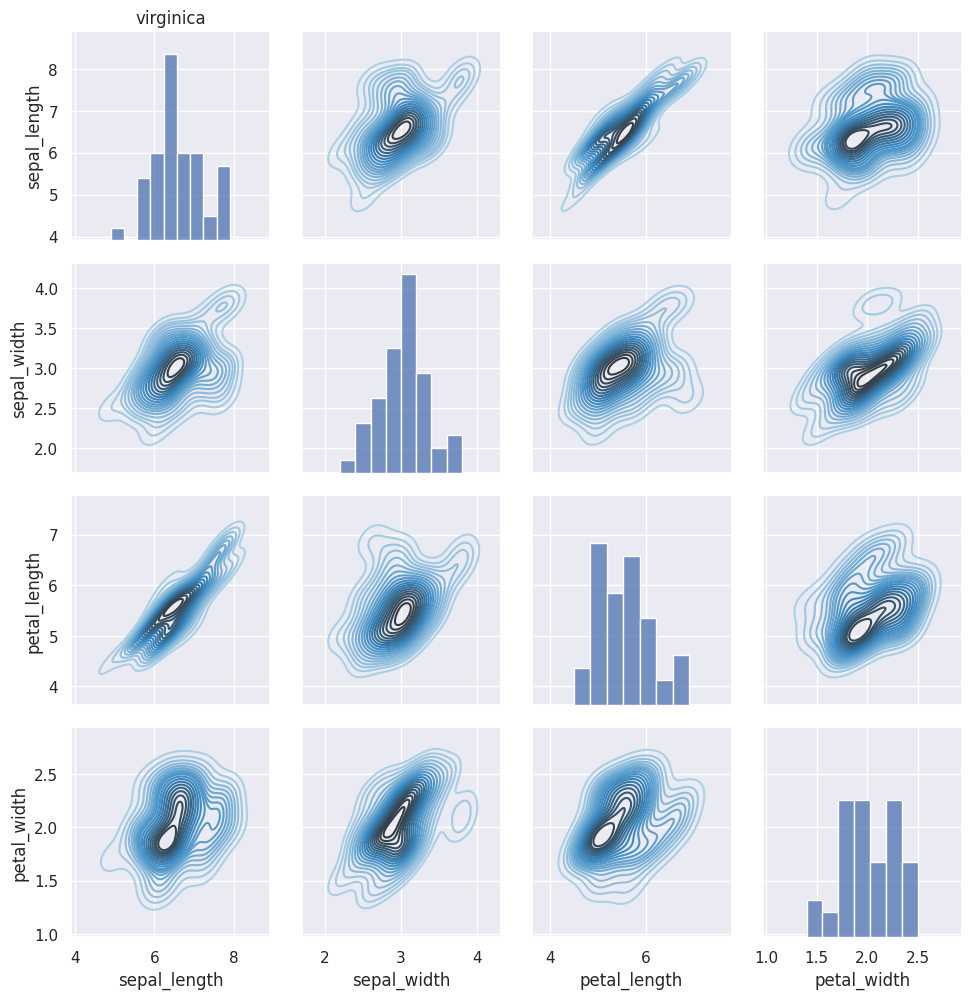

In [8]:
sns.set()
for i in range(len(data['species'].unique())):
    g = sns.PairGrid(data[data['species']==data['species'].unique()[i]])
    g.map_diag(sns.histplot) 
    g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=20)
    g.axes[0][0].set_title(data['species'].unique()[i])

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [10]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

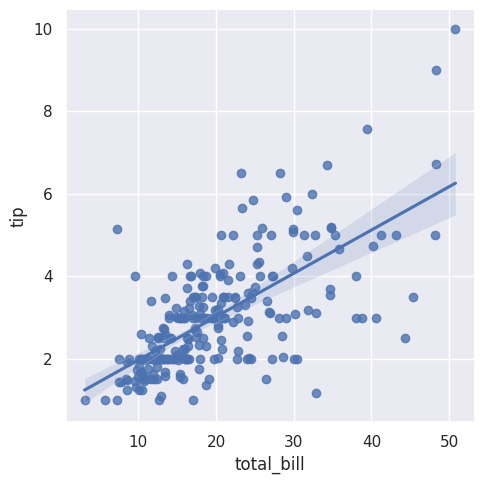

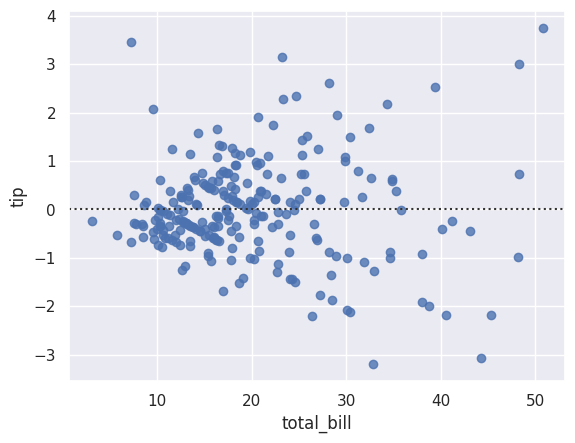

In [11]:
sns.lmplot(data,x='total_bill',y='tip')
plt.figure()
sns.residplot(data,x='total_bill',y='tip')

答：从上图可以看出总花费与小费可以近似认为存在线性关系，随着总花费的上升小费金额也在上升；总额小的时候给的小费更集中，大时更加分散。

<Axes: xlabel='sex', ylabel='tip'>

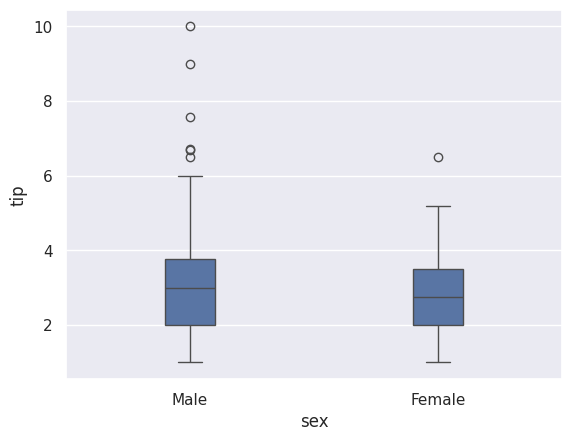

In [12]:
sns.boxplot(data,x='sex',y='tip',width=.2)

答：女性给的小费多余男性且更分散

<Axes: xlabel='smoker', ylabel='tip'>

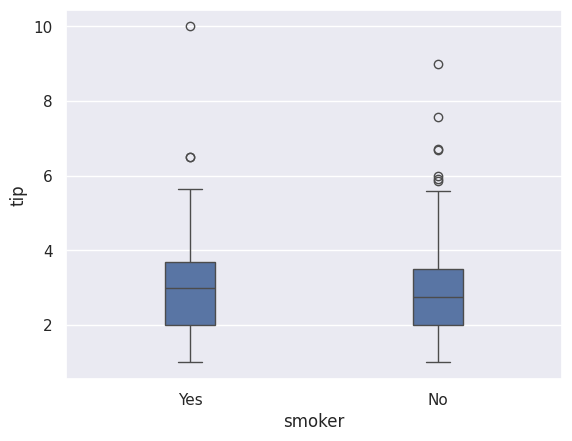

In [13]:
sns.boxplot(data,x='smoker',y='tip',width=.2)

答：吸烟者给的小费多余不吸烟者且更分散。

<Axes: xlabel='day', ylabel='tip'>

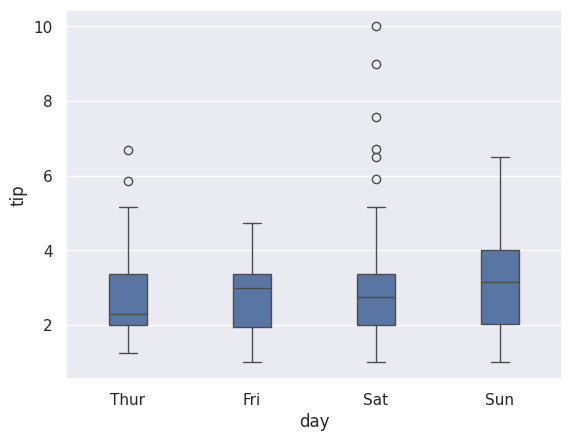

In [14]:
sns.boxplot(data,x='day',y='tip',width=.3)

答：周日给的小费较多且更加分散

<Axes: xlabel='time', ylabel='tip'>

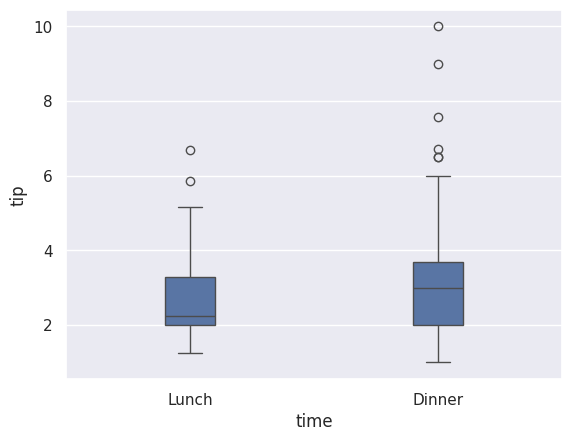

In [15]:
sns.boxplot(data,x='time',y='tip',width=.2)

答：晚餐给的小费更多，更加分散。

<Axes: xlabel='size', ylabel='tip'>

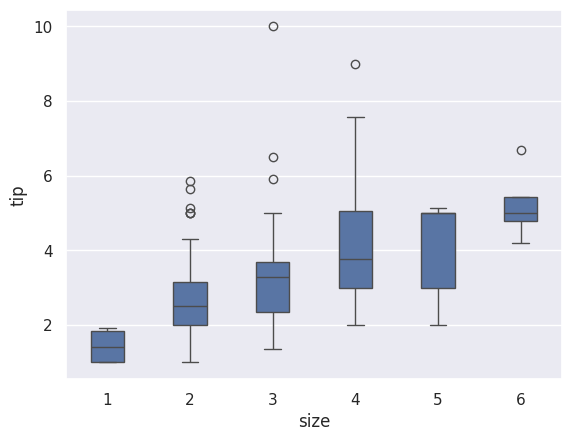

In [16]:
sns.boxplot(data,x='size',y='tip',width=.4)

答：就餐人数越多给的小费就越多，这可能跟好面子相关。

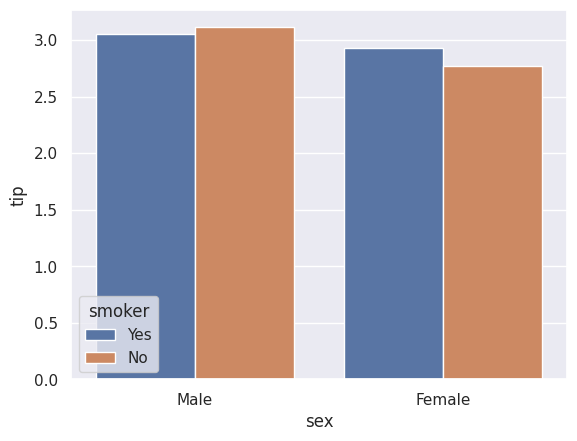

In [17]:
m=sns.barplot(data,x='sex',y='tip',hue='smoker',errorbar=('ci',0))

答：女性吸烟者比不吸烟者给的小费多。

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [22]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:

data4=data.loc[:,['survived','pclass']]
data4['total']=np.ones(len(data['survived']),dtype=np.int8)
data4['unsurvived']=data4.loc[:,'total']-data4.loc[:,'survived']
data4=data4[['survived','unsurvived','total','pclass']].groupby('pclass').agg('sum')
data4['survived_prop']=data4.loc[:,'survived']/data4.loc[:,'total']
data4['unsurvived_prop']=data4.loc[:,'unsurvived']/data4.loc[:,'total']
data4

,survived,unsurvived,total,survived_prop,unsurvived_prop
pclass,,,,,
1,136,80,216,0.629630,0.370370
2,87,97,184,0.472826,0.527174
3,119,372,491,0.242363,0.757637


<Axes: xlabel='pclass', ylabel='unsurvived_prop'>

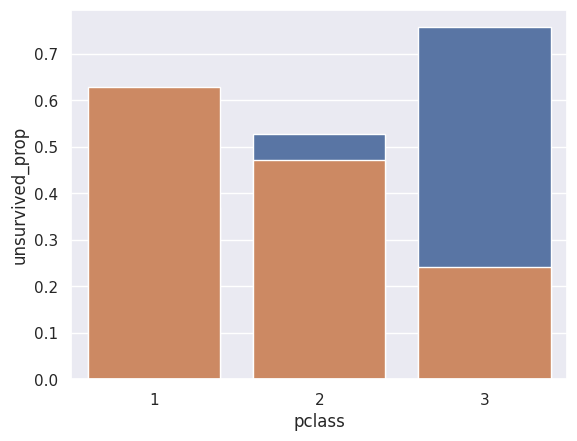

In [24]:
sns.barplot(data4,x='pclass',y='unsurvived_prop')
sns.barplot(data4,x='pclass',y='survived_prop')

答：3号仓位获救比例最低，1号获救比例最高。

In [26]:
data_sex=data.loc[:,['survived','sex']]
data_sex['total']=np.ones(len(data['survived']),dtype=np.int8)
data_sex['unsurvived']=data_sex.loc[:,'total']-data_sex.loc[:,'survived']
data_sex=data_sex[['survived','unsurvived','total','sex']].groupby('sex').agg('sum')
data_sex['survived_prop']=data_sex.loc[:,'survived']/data_sex.loc[:,'total']
data_sex['unsurvived_prop']=data_sex.loc[:,'unsurvived']/data_sex.loc[:,'total']
data_sex

,survived,unsurvived,total,survived_prop,unsurvived_prop
sex,,,,,
female,233,81,314,0.742038,0.257962
male,109,468,577,0.188908,0.811092


<Axes: xlabel='sex', ylabel='unsurvived_prop'>

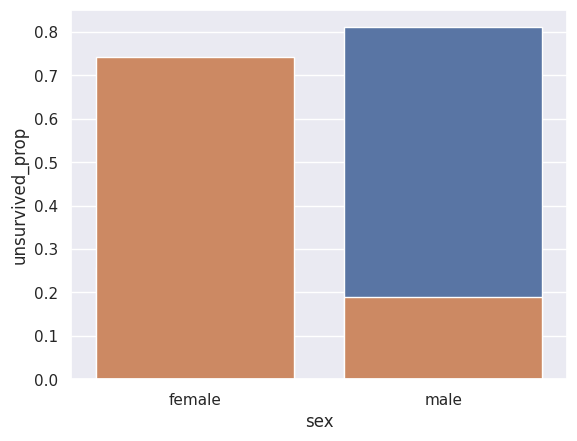

In [27]:

sns.barplot(data_sex,x='sex',y='unsurvived_prop')
sns.barplot(data_sex,x='sex',y='survived_prop')

答：男性获救比例较低。

<Axes: xlabel='survived', ylabel='fare'>

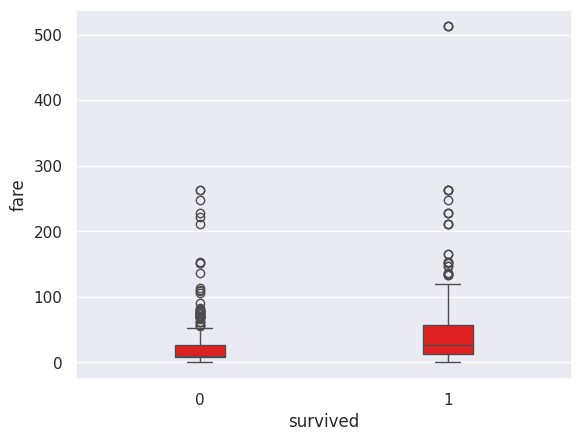

In [28]:
sns.boxplot(data,x='survived',y='fare',width=.2,color='#ff0000')


答：获救人员票价平均值大于未获救人员票价平均值，获救人员票价分布更分散。

<Axes: xlabel='survived', ylabel='age'>

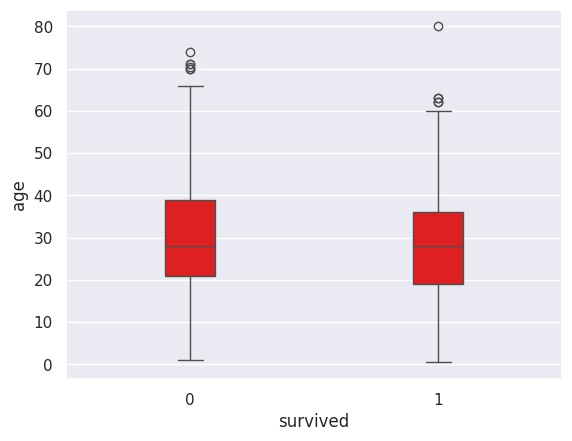

In [29]:
sns.boxplot(data,x='survived',y='age',width=.2,color='#ff0000')

答：获救的平均年龄大于未获救的。

<Axes: xlabel='pclass', ylabel='value'>

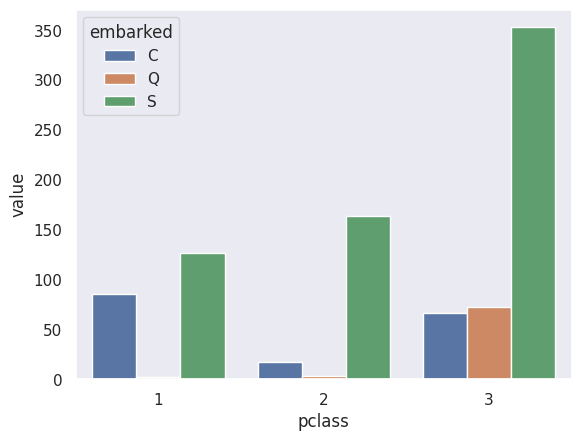

In [30]:
sns.set_style('dark')
data_e=data.loc[:,['embarked','pclass']]
data_e['value']=np.ones(len(data['embarked']),dtype=np.int8)
data_e=pd.pivot_table(data_e,index='embarked',columns='pclass',values='value',aggfunc='sum')
data_e['embarked']=['C','Q','S']
data_e=pd.melt(data_e,id_vars='embarked')
sns.barplot(data_e,x='pclass',y='value',hue='embarked')

答：3号仓买的人最多，s港上的人最多，可能是始发站。

<Axes: xlabel='survived', ylabel='sibsp'>

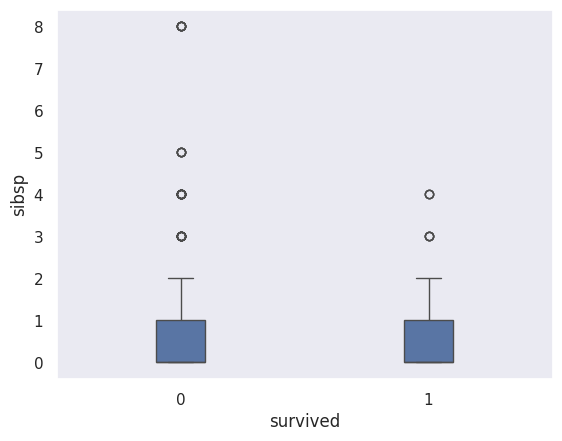

In [31]:
sns.boxplot(data,x='survived',y='sibsp',width=.2)

答：未获救的人兄弟姐妹个数离群值更多，可能他们一起乘船。

<Axes: xlabel='survived', ylabel='parch'>

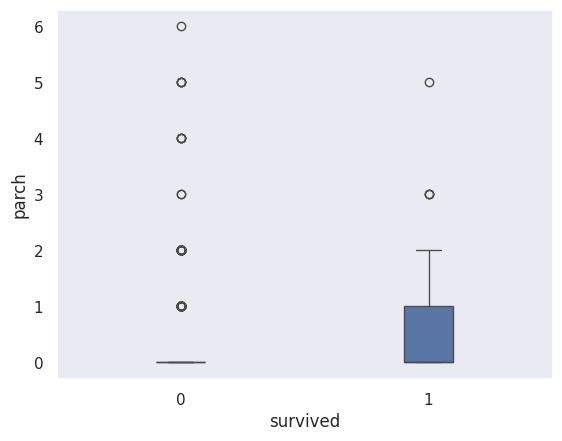

In [32]:
sns.boxplot(data,x='survived',y='parch',width=.2)

答:获救的人有父母子女的更多。

In [39]:
data_b=data.loc[:,['survived','alone']]
data_b['value']=np.ones(len(data.loc[:,'alone']),dtype=np.int8)
data_b=data_b.pivot_table(index='alone',columns='survived',values='value',aggfunc='sum')
data_b['alone']=['False','Ture']
data_b=pd.melt(data_b,id_vars='alone')
data_b

,alone,survived,value
0,False,0,175
1,Ture,0,374
2,False,1,179
3,Ture,1,163


<Axes: xlabel='alone', ylabel='value'>

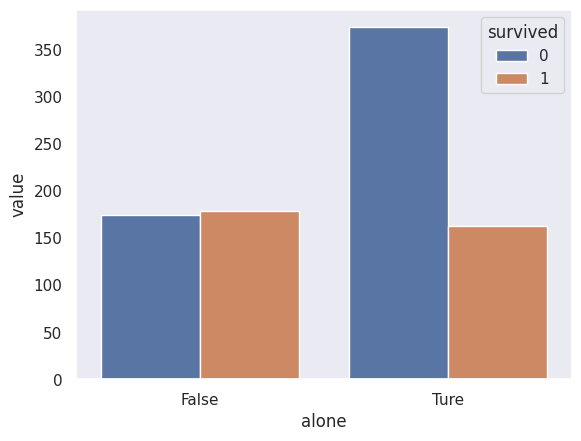

In [40]:
sns.barplot(data_b,x='alone',y='value',hue='survived')

答：单人乘船更不容易获救。